In [772]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Lasso
import re
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [773]:
df = pd.read_csv('car details v4.csv')

In [774]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [775]:
df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [776]:
df.dtypes

Make                   object
Model                  object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Color                  object
Owner                  object
Seller Type            object
Engine                 object
Max Power              object
Max Torque             object
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
dtype: object

In [777]:
df['Seller Type'].unique()

array(['Corporate', 'Individual', 'Commercial Registration'], dtype=object)

In [778]:
df['Fuel Type'].unique()

array(['Petrol', 'Diesel', 'CNG', 'LPG', 'Electric', 'CNG + CNG',
       'Hybrid', 'Petrol + CNG', 'Petrol + LPG'], dtype=object)

In [779]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD', nan], dtype=object)

In [780]:
df['Seating Capacity'].unique()

array([ 5.,  7.,  4., nan,  8.,  2.,  6.])

In [781]:
df['Make'].unique()

array(['Honda', 'Maruti Suzuki', 'Hyundai', 'Toyota', 'Mercedes-Benz',
       'BMW', 'Skoda', 'Nissan', 'Renault', 'Tata', 'Volkswagen', 'Ford',
       'Audi', 'Mahindra', 'MG', 'Jeep', 'Porsche', 'Kia', 'Land Rover',
       'Volvo', 'Maserati', 'Jaguar', 'Isuzu', 'Fiat', 'MINI', 'Ferrari',
       'Mitsubishi', 'Datsun', 'Lamborghini', 'Chevrolet', 'Ssangyong',
       'Rolls-Royce', 'Lexus'], dtype=object)

In [782]:
df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [783]:
threshold = len(df)*0.05
threshold

102.95

In [784]:
cols_to_drop = df.columns[df.isnull().sum()<threshold]

In [785]:
cols_to_drop

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Length', 'Width', 'Height',
       'Seating Capacity'],
      dtype='object')

In [786]:
df.dropna(subset=cols_to_drop,inplace=True)

In [787]:
df.isnull().sum()

Make                   0
Model                  0
Price                  0
Year                   0
Kilometer              0
Fuel Type              0
Transmission           0
Location               0
Color                  0
Owner                  0
Seller Type            0
Engine                 0
Max Power              0
Max Torque             0
Drivetrain            63
Length                 0
Width                  0
Height                 0
Seating Capacity       0
Fuel Tank Capacity    42
dtype: int64

In [788]:
imputer = SimpleImputer(strategy='most_frequent')

In [789]:
input_data = df['Drivetrain'].values.reshape(-1,1)
df['Drivetrain'] = imputer.fit_transform(input_data)

In [790]:
df['Drivetrain'].unique()

array(['FWD', 'RWD', 'AWD'], dtype=object)

In [791]:
df['Fuel Tank Capacity'] = df['Fuel Tank Capacity'].fillna(df['Fuel Tank Capacity'].mean())

In [792]:
df.isnull().sum()

Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64

In [793]:
pattern = pattern = r'(\d+\.?\d*)'
df['Engine'] = df['Engine'].str.extract(pattern)

In [794]:
df['Max Power'] = df['Max Power'].str.extract(pattern)
df['Max Power'].head()

0     87
1     74
2     79
3     82
4    148
Name: Max Power, dtype: object

In [795]:
df['Max Torque'] = df['Max Torque'].str.extract(pattern)
df['Max Torque'].head()

0         109
1         190
2    112.7619
3         113
4         343
Name: Max Torque, dtype: object

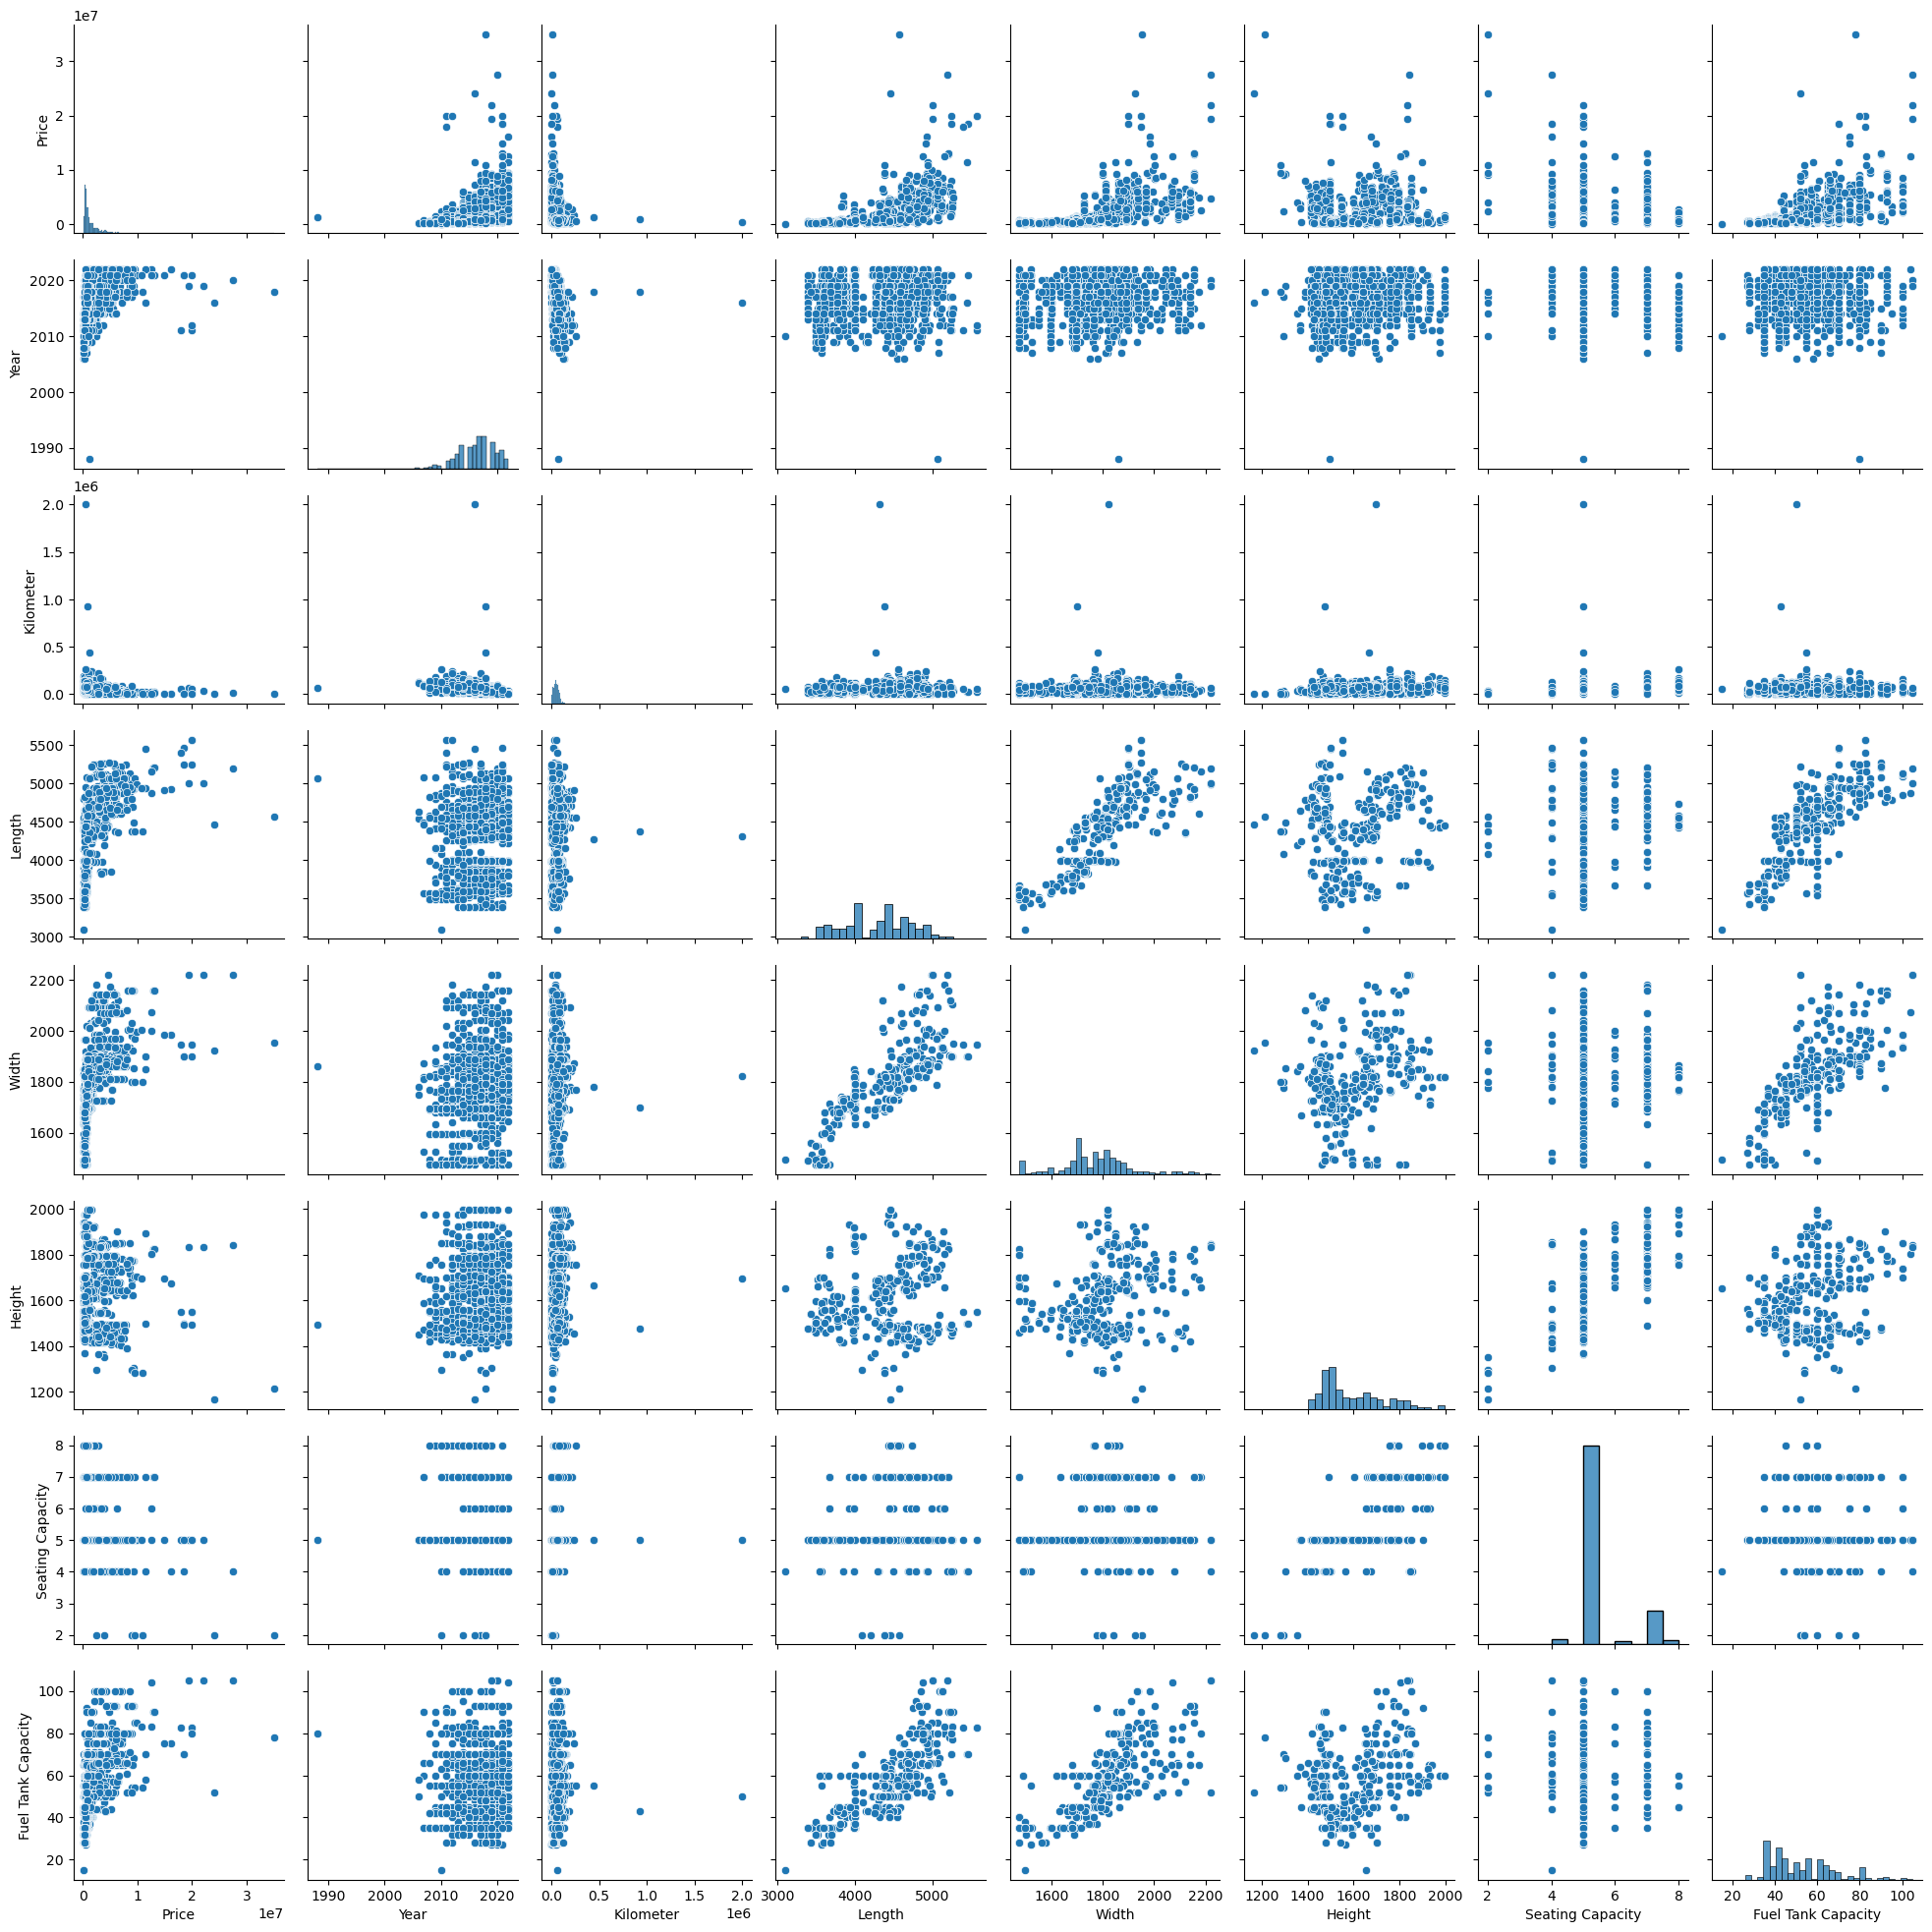

In [796]:
sns.pairplot(df)

<AxesSubplot:xlabel='Kilometer', ylabel='Price'>

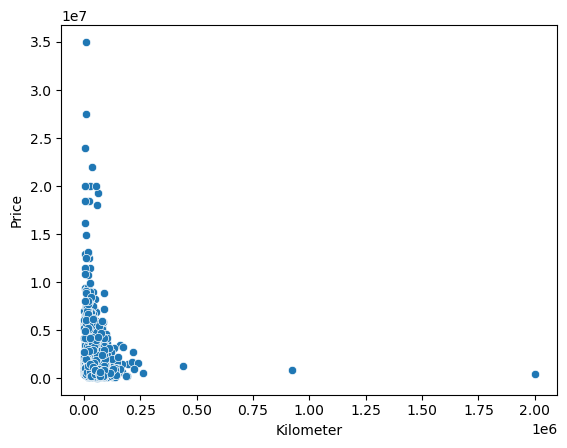

In [797]:
sns.scatterplot(x='Kilometer',y='Price',data=df)

C:\Users\HUSEYN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Transmission', ylabel='count'>

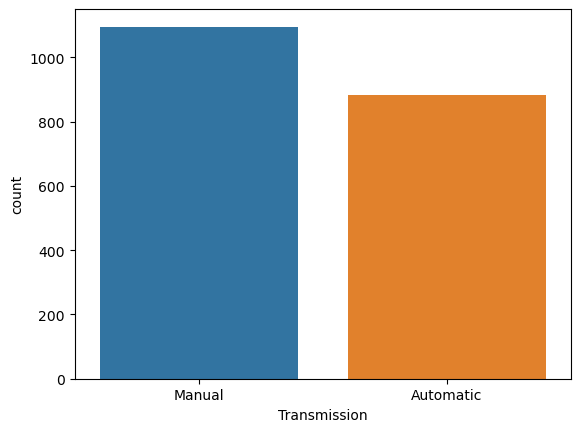

In [798]:
sns.countplot(df['Transmission'])

C:\Users\HUSEYN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


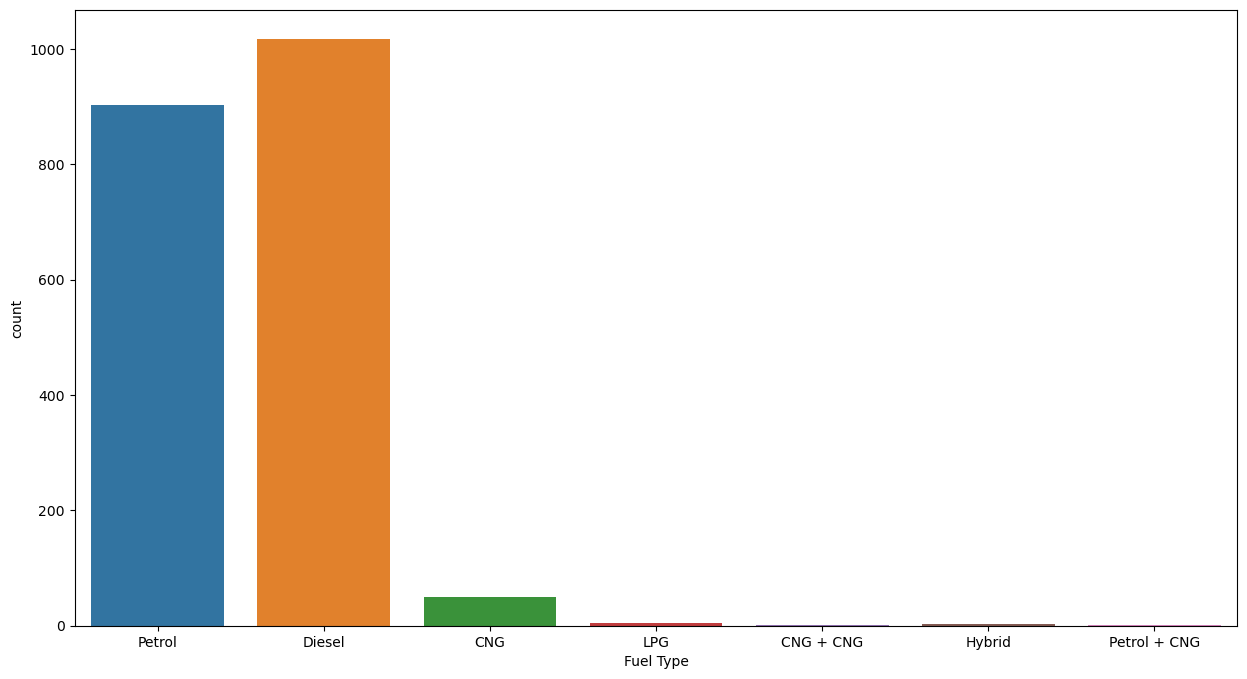

In [799]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(df['Fuel Type'])

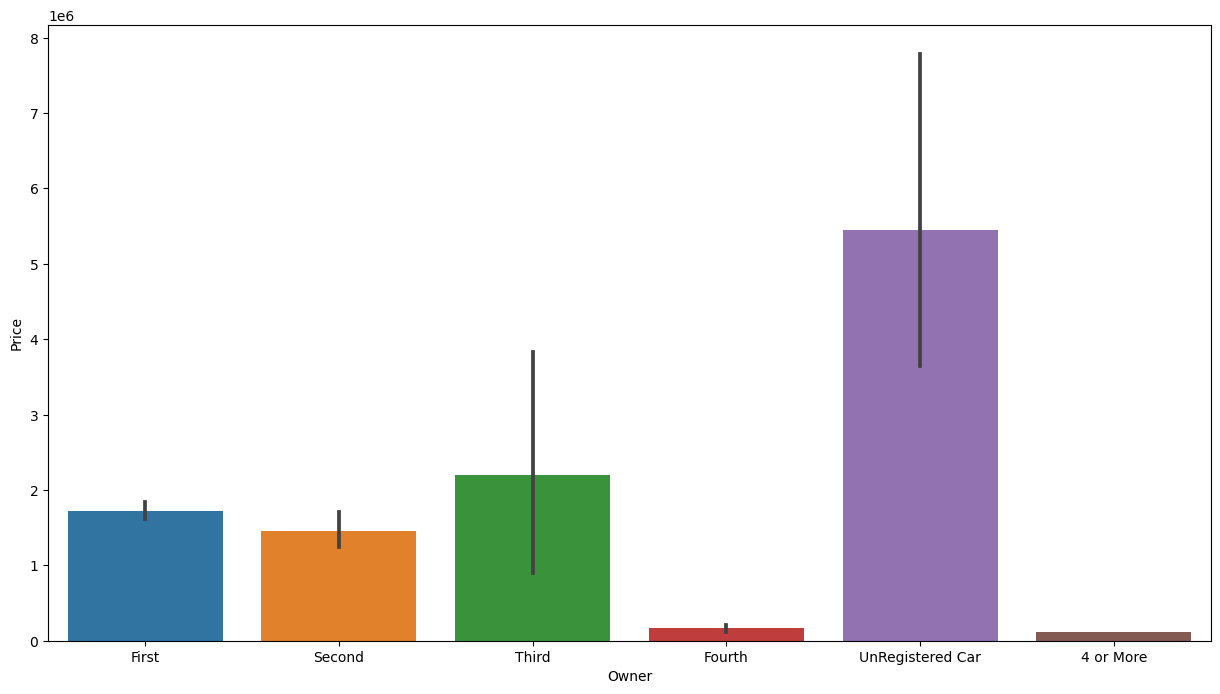

In [800]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.barplot(x='Owner',y='Price',data=df)

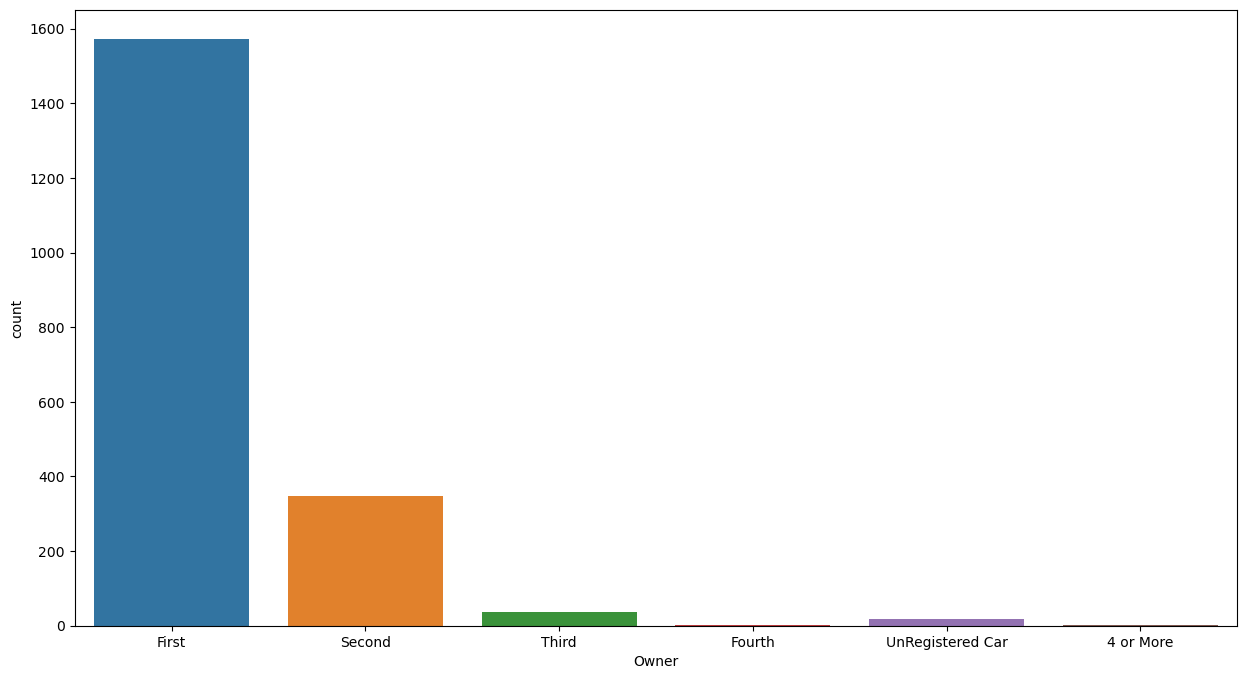

In [801]:
fig,ax=plt.subplots(figsize=(15,8))
ax=sns.countplot(x='Owner',data=df)

In [802]:
df['Age'] = 2024 - df['Year']

In [803]:
df.head()

,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,...,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,...,1198,87,109,FWD,3990.0,1680.0,1505.0,5.0,35.0,7
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,...,1248,74,190,FWD,3995.0,1695.0,1555.0,5.0,42.0,10
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,...,1197,79,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,13
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,...,1197,82,113,FWD,3995.0,1745.0,1510.0,5.0,37.0,5
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,...,2393,148,343,RWD,4735.0,1830.0,1795.0,7.0,55.0,6


In [804]:
df.columns

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Age'],
      dtype='object')

In [805]:
columns_to_drop = ['Make','Model','Year','Location','Color','Seller Type']
clean_df = df.drop(columns_to_drop, axis=1)

In [806]:
clean_df.head()

,Price,Kilometer,Fuel Type,Transmission,Owner,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity,Age
0,505000,87150,Petrol,Manual,First,1198,87,109,FWD,3990.0,1680.0,1505.0,5.0,35.0,7
1,450000,75000,Diesel,Manual,Second,1248,74,190,FWD,3995.0,1695.0,1555.0,5.0,42.0,10
2,220000,67000,Petrol,Manual,First,1197,79,112.7619,FWD,3585.0,1595.0,1550.0,5.0,35.0,13
3,799000,37500,Petrol,Manual,First,1197,82,113,FWD,3995.0,1745.0,1510.0,5.0,37.0,5
4,1950000,69000,Diesel,Manual,First,2393,148,343,RWD,4735.0,1830.0,1795.0,7.0,55.0,6


In [807]:
clean_data = pd.get_dummies(clean_df,columns=['Fuel Type','Owner','Drivetrain'],drop_first=True)

In [808]:
clean_data['Transmission'] = np.where(clean_data['Transmission']=='Automatic',1,0)

In [809]:
clean_data.head()

,Price,Kilometer,Transmission,Engine,Max Power,Max Torque,Length,Width,Height,Seating Capacity,...,Fuel Type_LPG,Fuel Type_Petrol,Fuel Type_Petrol + CNG,Owner_First,Owner_Fourth,Owner_Second,Owner_Third,Owner_UnRegistered Car,Drivetrain_FWD,Drivetrain_RWD
0,505000,87150,0,1198,87,109,3990.0,1680.0,1505.0,5.0,...,0,1,0,1,0,0,0,0,1,0
1,450000,75000,0,1248,74,190,3995.0,1695.0,1555.0,5.0,...,0,0,0,0,0,1,0,0,1,0
2,220000,67000,0,1197,79,112.7619,3585.0,1595.0,1550.0,5.0,...,0,1,0,1,0,0,0,0,1,0
3,799000,37500,0,1197,82,113,3995.0,1745.0,1510.0,5.0,...,0,1,0,1,0,0,0,0,1,0
4,1950000,69000,0,2393,148,343,4735.0,1830.0,1795.0,7.0,...,0,0,0,1,0,0,0,0,0,1


<AxesSubplot:>

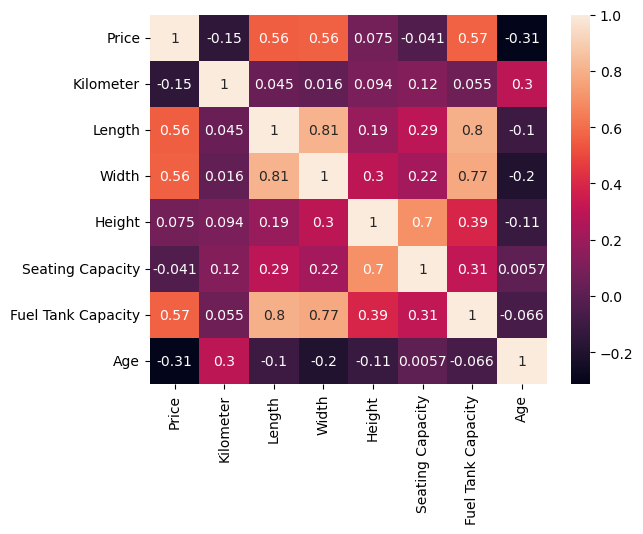

In [810]:
sns.heatmap(clean_df.corr(),annot=True)

In [811]:
clean_data.columns

Index(['Price', 'Kilometer', 'Transmission', 'Engine', 'Max Power',
       'Max Torque', 'Length', 'Width', 'Height', 'Seating Capacity',
       'Fuel Tank Capacity', 'Age', 'Fuel Type_CNG + CNG', 'Fuel Type_Diesel',
       'Fuel Type_Hybrid', 'Fuel Type_LPG', 'Fuel Type_Petrol',
       'Fuel Type_Petrol + CNG', 'Owner_First', 'Owner_Fourth', 'Owner_Second',
       'Owner_Third', 'Owner_UnRegistered Car', 'Drivetrain_FWD',
       'Drivetrain_RWD'],
      dtype='object')

In [812]:
X_train,X_test,y_train,y_test = train_test_split(clean_data.drop('Price',axis=1),clean_data['Price'],test_size=0.2,random_state=42)

In [813]:
lasso = Lasso()

In [814]:
lasso.fit(X_train,y_train)

C:\Users\HUSEYN\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.594e+15, tolerance: 1.031e+12
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [815]:
lasso.score(X_test,y_test)

0.7311818736320856

In [816]:
lasso.score(X_train,y_train)

0.6901400843520924

In [817]:
preds = lasso.predict(X_test)

In [818]:
mse = mean_squared_error(y_test,preds)
mse

1047073009397.4937

In [819]:
rmse = np.sqrt(mse)
rmse

1023265.8547012568

In [820]:
coeff_df = pd.DataFrame(lasso.coef_,clean_data.drop('Price',axis=1).columns,columns=['Coefficient'])
coeff_df

,Coefficient
Kilometer,-1.704069e+00
Transmission,-2.544604e+05
Engine,-7.645697e+02
Max Power,3.535144e+04
Max Torque,4.630734e+02
Length,-9.205150e+02
Width,-4.230123e+02
Height,-1.416096e+02
Seating Capacity,-1.431049e+05
Fuel Tank Capacity,2.010484e+04


<AxesSubplot:xlabel='Price'>

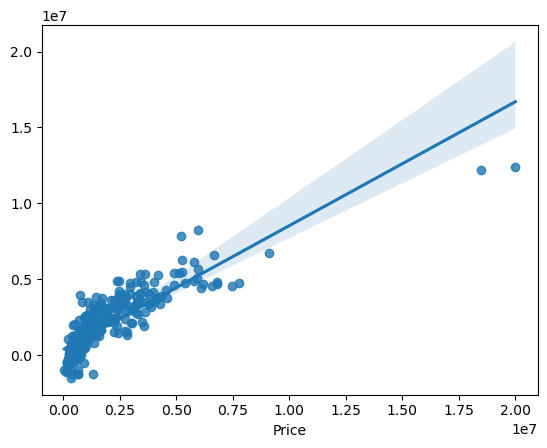

In [821]:
sns.regplot(x=y_test,y=preds)

In [822]:
from scipy.stats import pearsonr

In [823]:
correlation_coef, p_value = pearsonr(y_test,preds)
print(f'correlation coefficient is {correlation_coef}\np_value is {p_value}')

correlation coefficient is 0.8605758833327696
p_value is 1.674348451095573e-117
